In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from scipy.signal import savgol_filter

import joblib
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from modules.Utils.utils import loadFromDB, computeFutureLinearRegression, strategyTester
from modules.Utils.indicators import computeLaggingLinearRegression, computeTrixIndicator, addIndicators
from modules.Utils.classes.scalers import CustomMinMaxScaler, CustomStandardScaler

In [45]:
SYMBOL= 'ADA'
df = loadFromDB(f'../backtest_tools/database/database/Binance/1h/{SYMBOL}-USDT.csv')
df_BTC = loadFromDB(f'../backtest_tools/database/database/Binance/1h/BTC-USDT.csv')
df_BTC.head()

Total records : 36479 rows
Total records : 42271 rows


,Open,High,Low,Close,Volume,Timestamp
Date,,,,,,
2017-08-17 06:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,1502942400
2017-08-17 07:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,1502946000
2017-08-17 08:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,1502949600
2017-08-17 09:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,1502953200
2017-08-17 10:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,1502956800


In [46]:
df_BTC = df_BTC.loc[df.index[0]:]
df['Open_BTC'] = df_BTC.Open
df['High_BTC'] = df_BTC.High
df['Low_BTC'] = df_BTC.Low
df['Close_BTC'] = df_BTC.Close
df['Volume_BTC'] = df_BTC.Volume

df

In [7]:
df = computeLaggingLinearRegression(df,window=40,filter_ceof=True, derivative=False,)
df = computeFutureLinearRegression(df,window=40,filter_ceof=True, derivative=True,)
df = computeTrixIndicator(df)
df = addIndicators(df,derivative=True,double_derivative=True,b_engulfings=True)
df.head()

,Open,High,Low,Close,Volume,Timestamp,B_MLR_coefs,B_MLR_coefs_filtered,F_MLR_coefs,F_MLR_coefs_filtered,...,ADX,ATR,CCI,OVB,OVB_EMA200,EVM,Bullish_engulfing,Bearish_engulfing,Slope,Acceleration
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-29 03:00:00,0.38083,0.38298,0.37114,0.37507,8499676.05,1524963600,5.507142e-07,4.644456e-07,-2.054430e-07,-1.941748e-07,...,48.490376,33.276192,156.633410,41811277.61,-847937.613085,0.000761,0.0,0.0,-0.00576,-0.02983
2018-04-29 04:00:00,0.37572,0.37901,0.37003,0.37873,6260057.24,1524967200,5.872134e-07,4.872866e-07,-1.996255e-07,-1.930269e-07,...,49.565573,34.343966,141.246358,48071334.85,-361178.683104,-0.000364,0.0,0.0,0.00366,0.00942
2018-04-29 05:00:00,0.37873,0.37893,0.36726,0.37415,7375195.34,1524970800,6.243024e-07,5.054954e-07,-1.892123e-07,-1.904674e-07,...,50.080776,35.158220,104.023779,40696139.51,47351.846181,-0.000225,0.0,0.0,-0.00458,-0.00824
2018-04-29 06:00:00,0.37410,0.37447,0.36600,0.37055,5906267.56,1524974400,6.503940e-07,5.205047e-07,-1.842941e-07,-1.891002e-07,...,50.336777,35.841874,67.979227,34789871.95,393048.563632,-0.000410,0.0,0.0,-0.00360,0.00098
2018-04-29 07:00:00,0.37037,0.37852,0.37012,0.37490,5997432.54,1524978000,6.774601e-07,5.283347e-07,-1.839999e-07,-1.881082e-07,...,50.787384,36.593043,79.754036,40787304.49,794981.458422,0.000572,1.0,0.0,0.00435,0.00795


Period : [2021-11-20 18:00:00] -> [2022-06-17 02:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 20323.96 $
Performance vs US Dollar : 1932.4 %
Buy and Hold Performence : -74.44 %
Performance vs Buy and Hold : -2695.88 %
Best trade : +37.56 %, the 2022-05-31 12:00:00
Worst trade : -9.22 %, the 2022-05-10 23:00:00
Worst drawBack : -15.0 %
Total fees :  944.09 $

----- Trades Informations -----
Total trades on period : 110
Number of positive trades : 79
Number of negative trades :  31
Trades win rate ratio : 71.82 %
Average trades performance : 3.02 %
Average positive trades : 5.08 %
Average negative trades : -2.2 %

----- Plot -----


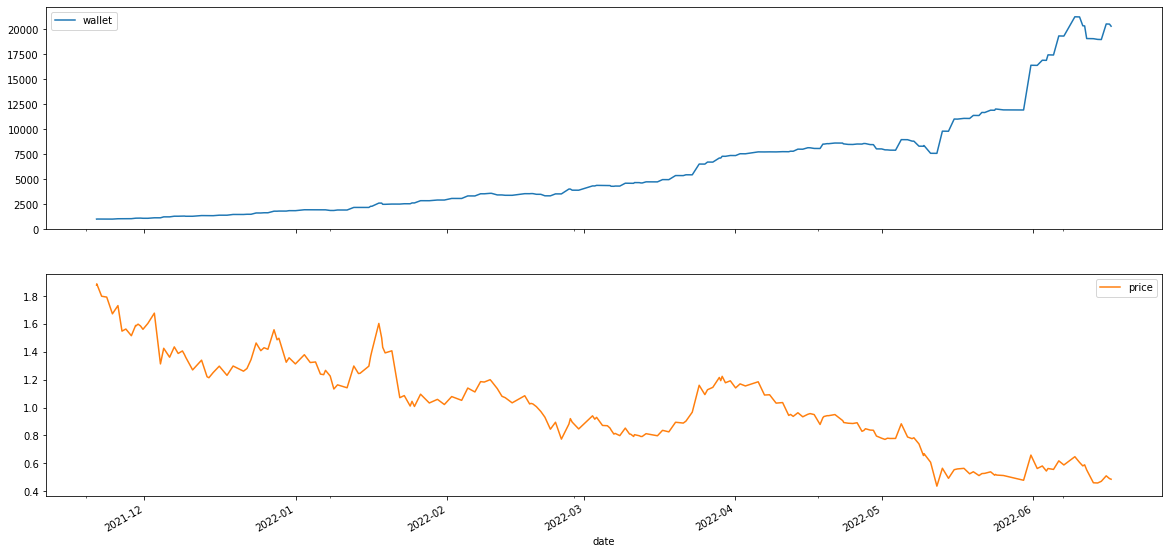

In [8]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if previous_row.F_MLR_coefs_filtered_diff>0 and row.F_MLR_coefs_filtered_diff<0 else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if previous_row.F_MLR_coefs_filtered_diff<0 and row.F_MLR_coefs_filtered_diff>0 else False

strategyTester(df.iloc[-5000:],buyCondition,sellCondition)

In [ ]:
window_to_see = 400
df_see = df.iloc[-window_to_see:]
fig, ax_left = plt.subplots(1, figsize=(25,8))

ax_left.plot(df_see.Close, color='green',label='Close')
ax = ax_left.twinx()
ax.plot(df_see.B_MLR_coefs_filtered, color='blue',label='B_MLR_coefs_filtered')
ax.plot(df_see.F_MLR_coefs_filtered, color='orange',label='F_MLR_coefs_filtered')
ax_left.legend(loc="upper left")
ax.legend(loc="upper right")

# Normalization

In [ ]:
df.columns

In [9]:
x_scaler = CustomStandardScaler()
x_scaled = x_scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Timestamp', 'B_MLR_coefs',
       'B_MLR_coefs_filtered', 'Trix',
       'Trix_histo', 'High_Low_diff', 'EMA20', 'EMA50', 'EMA100', 'EMA200',
       'MACD', 'Stoch_RSI', 'Vortex', 'Bollinger_low', 'Bollinger_high', 'ADX',
       'ATR', 'CCI', 'OVB', 'OVB_EMA200', 'EVM', 'Bullish_engulfing',
       'Bearish_engulfing', 'Slope', 'Acceleration']].values)

x_scaler.save(x_scaler,f'./models/std_scaler_{SYMBOL}.save')

# Decorrelation

In [ ]:
import seaborn as sb
corr = df.corr()
fig, ax = plt.subplots(1, figsize=(25,8))

sb.heatmap(corr, cmap="Blues", annot=True, ax=ax)

In [ ]:
from sklearn.decomposition import PCA

decomposer = PCA()
all_component_decorr = decomposer.fit_transform(x_scaled)

In [ ]:
var = decomposer.explained_variance_
var_ratio = decomposer.explained_variance_ratio_
var_ratio_cumcum = np.cumsum(var_ratio)
df_variances = pd.DataFrame(data={
    "Variance":var,
    "Variance_ratio":var_ratio,
    "Variance_ratio_cum":var_ratio_cumcum
},index=[i for i in ['Open', 'High', 'Low', 'Close', 'Volume',  'High_Low_diff', 'EMA20', 'EMA50', 'EMA100',
       'EMA200', 'MACD', 'Stoch_RSI', 'Vortex', 'Bollinger_low',
       'Bollinger_high', 'ADX', 'ATR', 'CCI', 'OVB', 'OVB_EMA200', 'TRIX','TRIX_HISTO', 'EVM']])
df_variances.head()

In [ ]:
fig, ax = plt.subplots(1, figsize=(25,10))

ax.plot(df_variances.Variance_ratio_cum,color='red')
ax.axhline(y=0.99,linestyle='--',color='black')
ax_2 = ax.twinx()
ax_2.hist(df_variances.Variance,alpha=0.4)

We need only 8 components to use the dataset with 95% variance

In [ ]:
decorrelator = PCA(n_components=11)
useful_component_decorr = decorrelator.fit_transform(x_scaled)
useful_component_decorr

# Predictions

In [ ]:
window_to_see = 400
df_see = df.iloc[-window_to_see:]
fig, ax_left = plt.subplots(2, figsize=(25,8))

ax_left[0].plot(df_see.Close, color='green',label='Close')
ax = ax_left[0].twinx()
#ax.plot(df_see.B_MLR_coefs_filtered, color='blue',label='B_MLR_coefs_filtered')
ax.plot(df_see.F_MLR_coefs_filtered, color='orange',label='F_MLR_coefs_filtered')
ax_left[0].legend(loc="upper left")
ax.legend(loc="upper right")
ax_left[1].plot(df_see.F_MLR_coefs_filtered_strat, color='blue',label='F_MLR_coefs_filtered_strat')
ax = ax_left[1].twinx()
ax.plot(df_see.F_MLR_coefs_filtered, color='orange',label='F_MLR_coefs_filtered')
ax_left[1].legend(loc="upper left")
ax.legend(loc="upper right")

## Classification

### Bins Classficiation

In [ ]:
WINDOW=20

X = np.array([x_scaled[i-WINDOW:i].reshape(1,-1)[0] for i in range(WINDOW,len(x_scaled))]) # Sklearn
y_clf = np.array([df.F_MLR_coefs_filtered_strat.iloc[i] for i in range(WINDOW,len(df))]) #Classification

X_train, X_test, y_train, y_test = train_test_split(X,y_clf,test_size=0.2, shuffle=True)

In [ ]:
model = RandomForestClassifier(n_estimators=120,criterion='entropy',verbose=1,n_jobs=4)
model.fit(X_train,y_train)

joblib.dump(model, f"./models/random_forect_clf_1h_{SYMBOL}.save")

In [ ]:
y_clf_pred = model.predict(X)
print(model.score(X_test,y_test))

## Regression

In [10]:
WINDOW=20

X = np.array([x_scaled[i-WINDOW:i].reshape(1,-1)[0] for i in range(WINDOW,len(x_scaled))]) # Sklearn
#X = np.array([useful_component_decorr[i:i+WINDOW].reshape(1,-1)[0] for i in range(len(useful_component_decorr)-WINDOW)]) # Sklearn + PCA 8
#X = np.array([x_scaled[i:i+WINDOW] for i in range(len(x_scaled)-WINDOW)]) # Tensorflow

y_reg = MinMaxScaler((-1,1)).fit_transform(np.array([df.F_MLR_coefs_filtered.iloc[i] for i in range(WINDOW,len(df))]).reshape(-1, 1)) #Regression

X_train, X_test, y_train, y_test = train_test_split(X,y_reg,test_size=0.2, shuffle=True)

In [ ]:
model = RandomForestRegressor(verbose=1,n_jobs=4)
model.fit(X_train,y_train)
joblib.dump(model, f"./models/random_forect_reg_1h_{SYMBOL}.save") 

In [ ]:
y_reg_pred = model.predict(X)
print(model.score(X_test,y_test))

## Correction

In [11]:
reg= joblib.load('./models/random_forect_reg_1h_ETH.save')
y_reg_pred = reg.predict(X)
clf = joblib.load('./models/random_forect_clf_1h_ETH.save')
y_clf_pred = clf.predict(X)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    1.8s finished


In [12]:
model = RandomForestRegressor(verbose=1,n_jobs=4)
model.fit(np.stack((y_clf_pred,y_reg_pred),axis=1),y_reg)
print(model.score(np.stack((y_clf_pred,y_reg_pred),axis=1),y_reg))
y_f = model.predict(np.stack((y_clf_pred,y_reg_pred),axis=1))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


0.8110466209428054


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


In [ ]:
joblib.dump(model, f"./models/random_forect_corrector_1h_{SYMBOL}.save") 

In [13]:
df['y_final'] = np.nan
df['y_final'].iloc[WINDOW:]=y_f
df = df.dropna()
df.head()

,Open,High,Low,Close,Volume,Timestamp,B_MLR_coefs,B_MLR_coefs_filtered,F_MLR_coefs,F_MLR_coefs_filtered,...,ATR,CCI,OVB,OVB_EMA200,EVM,Bullish_engulfing,Bearish_engulfing,Slope,Acceleration,y_final
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-29 23:00:00,0.36619,0.36650,0.36200,0.36351,2060044.81,1525035600,4.110170e-07,1.811588e-07,-1.877413e-07,-1.954159e-07,...,27.910408,42.420797,46126163.42,5.630180e+06,-0.000171,0.0,0.0,-0.00268,-0.00283,0.058326
2018-04-30 00:00:00,0.36328,0.36699,0.36100,0.36352,3367594.82,1525039200,3.674635e-07,1.649230e-07,-1.709251e-07,-1.743517e-07,...,27.179835,39.658866,49493758.24,6.066634e+06,-0.000045,0.0,0.0,0.00001,0.00269,0.066729
2018-04-30 01:00:00,0.36352,0.36524,0.36102,0.36254,2905530.64,1525042800,3.299479e-07,1.489736e-07,-1.558083e-07,-1.523731e-07,...,26.482470,19.293322,46588227.60,6.469834e+06,-0.000126,0.0,0.0,-0.00098,-0.00099,0.071619
2018-04-30 02:00:00,0.36251,0.36370,0.35210,0.35858,6040770.59,1525046400,2.882716e-07,1.299970e-07,-1.400863e-07,-1.305239e-07,...,25.312500,-95.310859,40547457.01,6.808915e+06,-0.001004,0.0,0.0,-0.00396,-0.00298,0.083281
2018-04-30 03:00:00,0.35859,0.36079,0.35534,0.35656,3343236.66,1525050000,2.401045e-07,1.091659e-07,-1.158086e-07,-1.093755e-07,...,24.195709,-144.687466,37204220.35,7.111356e+06,0.000027,0.0,0.0,-0.00202,0.00194,0.076837


In [28]:
df['y_final_filtered'] = savgol_filter(df.y_final,25,1,mode='nearest')
df['y_final_filtered_diff']  = df['y_final_filtered'].diff(10)

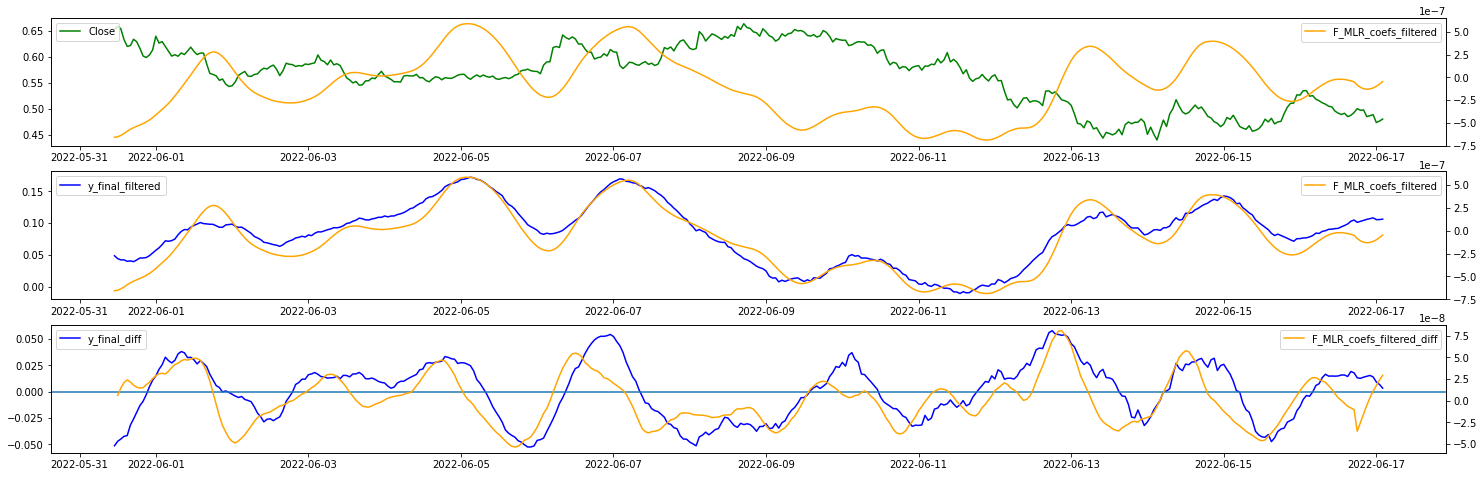

In [29]:
window_to_see = 400
df_see = df.iloc[-window_to_see:]
fig, ax_left = plt.subplots(3, figsize=(25,8))

ax_left[0].plot(df_see.Close, color='green',label='Close')
ax = ax_left[0].twinx()
#ax.plot(df_see.B_MLR_coefs_filtered, color='blue',label='B_MLR_coefs_filtered')
ax.plot(df_see.F_MLR_coefs_filtered, color='orange',label='F_MLR_coefs_filtered')
ax_left[0].legend(loc="upper left")
ax.legend(loc="upper right")
ax_left[1].plot(df_see.y_final_filtered, color='blue',label='y_final_filtered')
ax = ax_left[1].twinx()
ax.plot(df_see.F_MLR_coefs_filtered, color='orange',label='F_MLR_coefs_filtered')
ax_left[1].legend(loc="upper left")
ax.legend(loc="upper right")

ax_left[2].plot(df_see.y_final_filtered_diff, color='blue',label='y_final_diff')
ax = ax_left[2].twinx()
ax.plot(df_see.F_MLR_coefs_filtered.diff(), color='orange',label='F_MLR_coefs_filtered_diff')
ax_left[2].axhline(y=0)
ax_left[2].legend(loc="upper left")
ax.legend(loc="upper right")

Period : [2021-11-20 18:00:00] -> [2022-06-17 02:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 14343.1 $
Performance vs US Dollar : 1334.31 %
Buy and Hold Performence : -74.44 %
Performance vs Buy and Hold : -1892.44 %
Best trade : +21.95 %, the 2022-05-13 16:00:00
Worst trade : -16.4 %, the 2022-01-21 01:00:00
Worst drawBack : -17.0 %
Total fees :  582.72 $

----- Trades Informations -----
Total trades on period : 92
Number of positive trades : 69
Number of negative trades :  23
Trades win rate ratio : 75.0 %
Average trades performance : 3.18 %
Average positive trades : 5.24 %
Average negative trades : -3.01 %

----- Plot -----


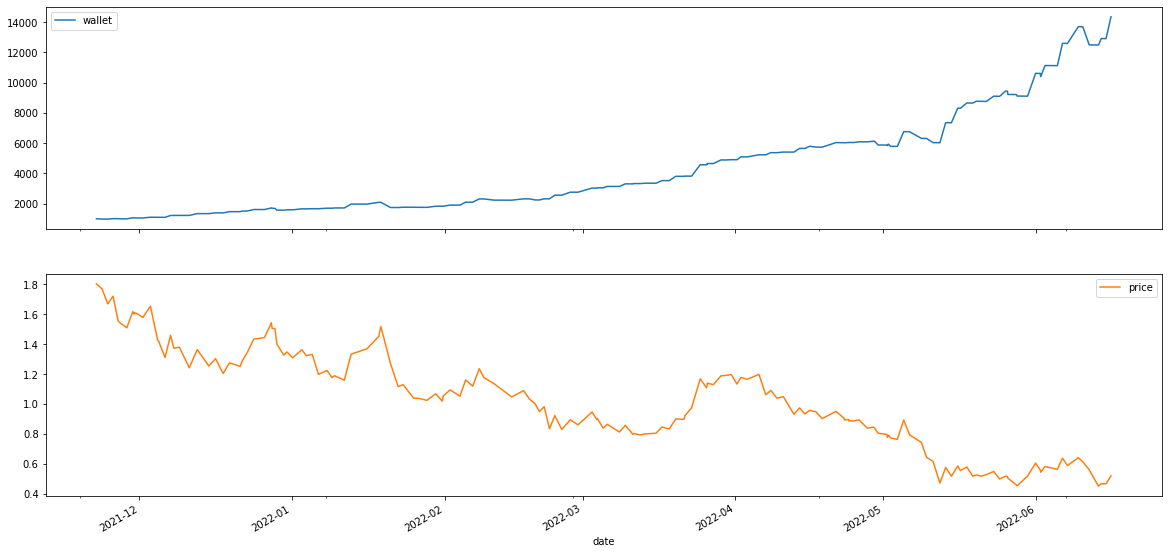

In [31]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if previous_row.y_final_filtered_diff>0 and row.y_final_filtered_diff<0 else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if previous_row.y_final_filtered_diff<0 and row.y_final_filtered_diff>0 else False

strategyTester(df.iloc[-5000:],buyCondition,sellCondition)

# Live Testing

In [ ]:
# Kucoin
from kucoin.client import Market
client = Market(url='https://api.kucoin.com')

klines = client.get_kline('AVAX-USDT','1hour', startAt=round(datetime.now().timestamp())-94900000, endAt=round(datetime.now().timestamp()))

df = pd.DataFrame(klines,columns=['Date','Open','High','Low','Close','Volume','Amount'],dtype=float)
df = df.sort_values(by='Date')
df['Timestamp'] = df['Date'].astype(int)
df['Date'] = df['Date'].astype(int).apply(datetime.fromtimestamp)
df = df.set_index('Date')

print(f"Total records : {len(df)} rows")

df = computeLaggingLinearRegression(df,window=40,filter_ceof=True, derivative=False,)
#df = computeFutureLinearRegression(df,window=40,filter_ceof=True, derivative=False,)
df = addIndicators(df,derivative=True,double_derivative=True,b_engulfings=True)
df.head()

In [ ]:
df.tail()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from joblib import load, dump


class CustomStandardScaler(StandardScaler):
    def load(self, path:str)->StandardScaler:
        return load(path)
    
    def save(self,scaler:StandardScaler, path:str):
        return dump(scaler,path)

In [ ]:
import pickle
import joblib
loaded_model = pickle.load(open('./models/random_forect_reg_1h_AVAX.save', 'rb'))
loaded_scaler = joblib.load('./models/std_scaler_AVAX.save') 

In [ ]:
df_scaled = loaded_scaler.transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'High_Low_diff', 'EMA20', 'EMA50', 'EMA100', 'B_MLR_coefs',
       'B_MLR_coefs_filtered',
       'EMA200', 'MACD', 'Stoch_RSI', 'Vortex', 'Bollinger_low',
       'Bollinger_high', 'ADX', 'ATR', 'CCI', 'OVB', 'OVB_EMA200','TRIX_HISTO', 'EVM', 'Bullish_engulfing',
       'Bearish_engulfing', 'Slope', 'Acceleration']].values)

print(len(df_scaled))
df_scaled

In [ ]:
WINDOW=30

#X = np.array([df_scaled[-(i+WINDOW):-i].reshape(1,-1)[0] for i in range(1,len(df_scaled)-WINDOW)])
X =[df_scaled[i-WINDOW:i].reshape(1,-1)[0] for i in range(WINDOW,len(df))]


In [ ]:
y_pred = loaded_model.predict(X)


In [ ]:
df['y_pred'] = np.nan
df['y_pred'].iloc[WINDOW:]=y_pred
df['y_pred_mean'] =  df['y_pred'].rolling(10).mean()

In [ ]:
df['y_pred_mean_diff'] = df['y_pred_mean'].diff()

In [ ]:
df.dropna(inplace=True)
POSITION_OPENED = False
df['BUY_SELL'] = 'HOLD'
for i in range(1,len(df)):
    if POSITION_OPENED==False:
        if df.y_pred_mean_diff.iloc[i-1]>0 and df.y_pred_mean_diff.iloc[i]<0:
            df['BUY_SELL'][i] = 'BUY'
            POSITION_OPENED=True   
            last_buy_price  = df['Close'][i]       
    else:
        if df.y_pred_mean_diff.iloc[i-1]<0 and df.y_pred_mean_diff.iloc[i]>0:
            df['BUY_SELL'][i] = 'SELL'
            POSITION_OPENED=False   
            
trades = df[df['BUY_SELL']!='HOLD'][['Close','BUY_SELL']]
trades['Change'] = trades['Close'].pct_change()*100
trades = trades[trades['BUY_SELL']=='SELL']
print(f"Gain : {round(trades.Change.sum())} %")
print(f"Winrate : {round(100*len(trades[trades['Change']>0].Change)/len(trades))} %")
print(f"Total trades : {len(trades)*2}")
print(f"Average pct {trades.Change.mean()}%")
print(f"Average gain {trades[trades['Change']>0].Change.mean()}%")
print(f"Average loss {trades[trades['Change']<0].Change.mean()}%")
print(f"Total not worthy trade {trades[trades['Change']<0.1]['Change'].count()}")

In [ ]:
fig, ax_left = plt.subplots(1, figsize=(25,8))
window = -1000
df_to_see = df.iloc[window:]
ax_left.plot(df_to_see['Close'], color='blue',label='Real')
ax_left.scatter(df_to_see[df_to_see['BUY_SELL']=='BUY'].index, df_to_see[df_to_see['BUY_SELL']=='BUY'].Close, color='blue',label='BUY',marker='^',s=200)
ax_left.scatter(df_to_see[df_to_see['BUY_SELL']=='SELL'].index, df_to_see[df_to_see['BUY_SELL']=='SELL'].Close, color='red',label='SELL',marker='v',s=200)
ax = ax_left.twinx()
ax.plot(df_to_see['y_pred_mean'], color='orange',label='Pred')
#ax.plot(df_to_see.F_MLR_coefs, color='red',label='B_MLR_coefs',)
ax_left.legend(loc="upper left")
ax.legend(loc="upper right")

In [ ]:
df